In [54]:
# Sumani
# https://www.linkedin.com/in/sumanaruban/
# https://github.com/Sumanaruban
# 28-7-2024


# Simple Neural Network on Iris Dataset 🌸
This notebook demonstrates how to build a basic neural network using PyTorch to classify the Iris dataset.

### What you’ll learn:
- Basic neural network architecture
- How data is loaded and prepared
- How model training works
- How predictions are made and evaluated

## Import packages and modules

We use:

    - torch for tensor operations and neural network building.

    - torch.nn and torch.nn.functional for model architecture and activations.


In [55]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

## 🌼 Iris Dataset Description
The Iris dataset contains 150 samples from 3 flower species:
- Setosa
- Versicolor
- Virginica

Each sample has 4 measurements:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Our goal is to classify the species based on these 4 features.

In [56]:
# Load the Dataset
iris = load_iris()

In [57]:
# Examine the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
# Examine the dataset
print (df['target'].value_counts())
print (iris.target_names)

target
0    50
1    50
2    50
Name: count, dtype: int64
['setosa' 'versicolor' 'virginica']


In [59]:
# Split the dataset for training and testing
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [60]:
# Convert the dataset to tensor format
X_tr_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tr_tensor = torch.tensor(y_train, dtype=torch.long)

## 🧠 What is a Neural Network?
A neural network is a function approximator made of layers of neurons:
- **Input Layer**: Takes input features (4 in this case)
- **Hidden Layer(s)**: Learns internal representations
- **Output Layer**: Produces class probabilities (3 classes here)

We’ll use PyTorch's `nn.Sequential` to define the model.

In [61]:
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super().__init__()

        # First Layer
        self.layer_1 = nn.Linear(4, 64)     # Input layer to 64 neurons
        self.activation_1 = nn.ReLU()       # ReLU activation function

        # Second Layer
        self.layer_2 = nn.Linear(64, 16)    # 64 neurons to 16 neurons
        self.activation_2 = nn.ReLU()       # Another ReLU

        # Third and the final Layer
        self.layer_3 = nn.Linear(16, 3)     # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.layer_1(x)
        x = self.activation_1(x)
        x = self.layer_2(x)
        x = self.activation_2(x)
        x = self.layer_3(x)
        return x

In [62]:
from torchsummary import summary

model = FullyConnectedNN()
summary(model, input_size=(1, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             320
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 16]           1,040
              ReLU-4                [-1, 1, 16]               0
            Linear-5                 [-1, 1, 3]              51
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [63]:
#pip install torchviz

In [64]:
from torchviz import make_dot
import torch

model = FullyConnectedNN()
x = torch.randn(1, 4)
y = model(x)

make_dot(y, params=dict(model.named_parameters())).render("nn_iris_graph", format="png")


'nn_iris_graph.png'

## ⚙️ Training the Network
Each epoch involves:
1. **Forward pass**: Model makes predictions
2. **Loss computation**: Compare predictions with true labels
3. **Backward pass**: Compute gradients using backpropagation
4. **Optimizer step**: Adjust model weights

We repeat this for several epochs to minimize the loss.

In [65]:
def train_model(model):
    epochs = 400
    loss_arr = []

    # Use CrossEntropyLoss as our loss function.
    loss_fn = nn.CrossEntropyLoss()

    # Use Adam optimizer for adjusting the weights.
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        # forward pass
        ypred = model(X_tr_tensor)

        # calculate loss
        loss = loss_fn(ypred, y_tr_tensor)
        loss_arr.append(loss.item())

        # backward pass
        loss.backward()
        optim.step()
        optim.zero_grad()

    # Plot the loss over epochs to visualize the learning process.
    plt.plot(loss_arr)
    plt.show()

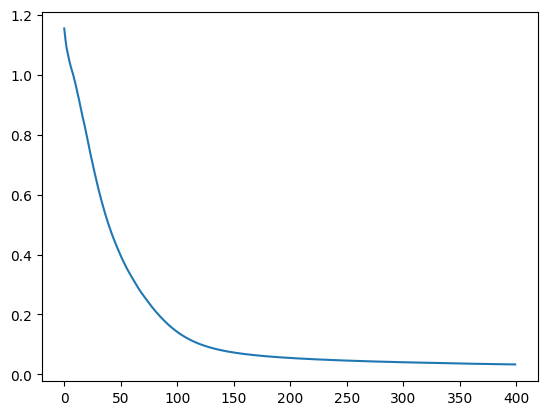

In [66]:
model = FullyConnectedNN()
train_model(model)

## ✅ Final Evaluation
After training, we use the test set to evaluate model performance.
We’ll check:
- Predictions vs actual values
- Accuracy of the classifier

This helps us assess how well the model has learned.

In [67]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_pred = model(X_test_tensor)
y_test_pred = torch.argmax(y_test_pred, dim=1)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print("Accuracy:", accuracy_score(y_test_pred, y_test))

Accuracy: 0.9333333333333333


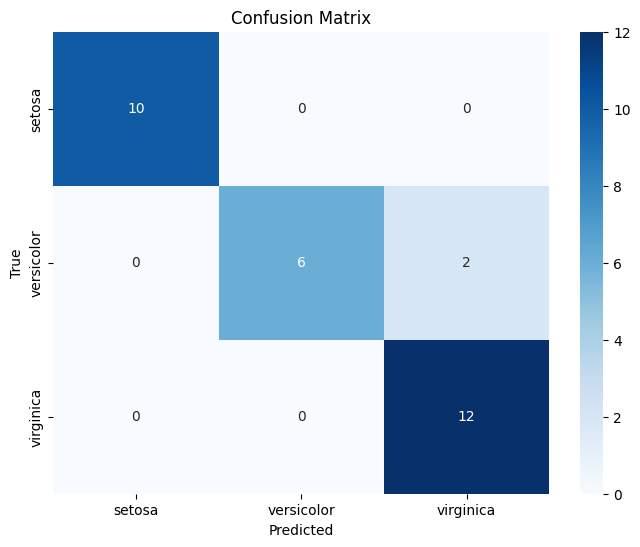

In [69]:
confused_matrix = confusion_matrix(y_test_pred, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Exercise

In [70]:
# 🌿 Develop a Decision Tree Classifier on Iris Dataset

In [71]:
# Print the confusion Matrix

In [72]:
# How does the accuracy of this Decision Tree compare to the Neural Network?


In [73]:
# Which model is easier to interpret?

In [74]:
# Which one performs better on this small, structured dataset?

In [75]:
# Would a neural network be necessary for this kind of problem?